# Lab | Customer analysis round 4

## Import libraries and select the directory

In [1]:
#import numpy and panda libraries
import numpy as np 
import pandas as pd 
import time
from datetime import date
import matplotlib.pyplot as plt 
import seaborn as sns

## Read the files and show info

In [2]:
#read the files
df=pd.read_csv('marketing_customer_analysis.csv')

In [3]:
#Show the dataframe head
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
#Show the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [5]:
#Show the dataframe shape
df.shape

(10910, 26)

## Standardize header names

In [6]:
df.columns.to_list()

['Unnamed: 0',
 'Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [7]:
def standardize_col(col):
    return col.lower().replace(" ","_")

In [8]:
standardize_col("Total Claim Amount")

'total_claim_amount'

In [9]:
new_cols=[]
for col in df.columns:
    new_cols.append(standardize_col(col))

In [10]:
new_cols

['unnamed:_0',
 'customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [11]:
df.columns=new_cols

In [12]:
df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


## Categorical and numerical columns

In [13]:
#show numerical columns

In [14]:
df_numerical=df.select_dtypes(np.number)

In [15]:
df_numerical

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [16]:
#show categorical columns

In [17]:
df_categorical=df.select_dtypes(include='object')

In [18]:
df_categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


## NaN values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [20]:
#use this if we think we have any complete row nulls 

df.isna().all(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
10905    False
10906    False
10907    False
10908    False
10909    False
Length: 10910, dtype: bool

In [21]:
#nulls snapshot table 
nullsdf=pd.DataFrame(round(df.isna().sum()/len(df),4)*100)

In [22]:
nullsdf=nullsdf.rename(columns={'index':'header',0:'proportionnulls'})

In [23]:
nullsdf

,proportionnulls
unnamed:_0,0.00
customer,0.00
state,5.78
customer_lifetime_value,0.00
response,5.78
coverage,0.00
education,0.00
effective_to_date,0.00
employmentstatus,0.00
gender,0.00


In [24]:
df[df['vehicle_type'].isna()==True]

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
7,7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10898,10898,SO95845,California,5807.659307,No,Basic,College,1/7/11,Employed,F,...,0.0,7,Personal Auto,Personal L3,Offer4,Call Center,133.977857,Two-Door Car,Medsize,NaN
10900,10900,VN73653,Oregon,6423.739052,No,Basic,College,2/13/11,Unemployed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Agent,1621.560425,Luxury SUV,Medsize,NaN
10901,10901,RY92254,Washington,4547.892543,No,Premium,Bachelor,1/13/11,Employed,M,...,0.0,1,Personal Auto,Personal L3,Offer4,Agent,801.577478,Two-Door Car,Medsize,NaN
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN


In [25]:
#fill null genders with a new label 
df['vehicle_type']=df['vehicle_type'].fillna("Unknown")

In [26]:
df[df['state'].isna()==True]

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
11,11,GE63585,NaN,2420.711888,NaN,Basic,Bachelor,2/7/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,Unknown
58,58,BR69566,NaN,14019.833140,NaN,Basic,College,2/18/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer4,Call Center,469.882367,Two-Door Car,Small,Unknown
62,62,UF44021,NaN,2108.493744,NaN,Basic,Bachelor,1/2/11,Unemployed,M,...,0.0,1,Personal Auto,Personal L2,Offer1,Agent,351.856810,Two-Door Car,Medsize,Unknown
126,126,TE60343,NaN,4716.264294,NaN,Basic,High School or Below,2/25/11,Employed,M,...,1.0,3,Corporate Auto,Corporate L3,Offer2,Agent,292.800000,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,10837,IJ40048,NaN,4978.950257,NaN,Basic,Bachelor,1/31/11,Employed,M,...,0.0,4,Corporate Auto,Corporate L2,Offer1,Branch,221.241837,Four-Door Car,Medsize,A
10849,10849,SO38188,NaN,5308.617246,NaN,Extended,Bachelor,1/24/11,Employed,M,...,0.0,1,Special Auto,Special L2,Offer1,Agent,652.800000,SUV,Medsize,Unknown
10874,10874,PD52748,NaN,10036.536340,NaN,Extended,High School or Below,2/12/11,Unemployed,F,...,1.0,8,Personal Auto,Personal L3,Offer1,Call Center,1353.289060,SUV,Medsize,Unknown
10894,10894,EX63393,NaN,6314.492009,NaN,Extended,Master,2/27/11,Employed,F,...,0.0,6,Personal Auto,Personal L1,Offer3,Agent,374.400000,Four-Door Car,Small,Unknown


In [27]:
#fill null genders with a new label 
df['state']=df['state'].fillna("Unknown")

In [28]:
df[df['response'].isna()==True]

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
5,5,HO81102,Unknown,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
11,11,GE63585,Unknown,2420.711888,NaN,Basic,Bachelor,2/7/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,Unknown
58,58,BR69566,Unknown,14019.833140,NaN,Basic,College,2/18/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer4,Call Center,469.882367,Two-Door Car,Small,Unknown
62,62,UF44021,Unknown,2108.493744,NaN,Basic,Bachelor,1/2/11,Unemployed,M,...,0.0,1,Personal Auto,Personal L2,Offer1,Agent,351.856810,Two-Door Car,Medsize,Unknown
126,126,TE60343,Unknown,4716.264294,NaN,Basic,High School or Below,2/25/11,Employed,M,...,1.0,3,Corporate Auto,Corporate L3,Offer2,Agent,292.800000,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,10837,IJ40048,Unknown,4978.950257,NaN,Basic,Bachelor,1/31/11,Employed,M,...,0.0,4,Corporate Auto,Corporate L2,Offer1,Branch,221.241837,Four-Door Car,Medsize,A
10849,10849,SO38188,Unknown,5308.617246,NaN,Extended,Bachelor,1/24/11,Employed,M,...,0.0,1,Special Auto,Special L2,Offer1,Agent,652.800000,SUV,Medsize,Unknown
10874,10874,PD52748,Unknown,10036.536340,NaN,Extended,High School or Below,2/12/11,Unemployed,F,...,1.0,8,Personal Auto,Personal L3,Offer1,Call Center,1353.289060,SUV,Medsize,Unknown
10894,10894,EX63393,Unknown,6314.492009,NaN,Extended,Master,2/27/11,Employed,F,...,0.0,6,Personal Auto,Personal L1,Offer3,Agent,374.400000,Four-Door Car,Small,Unknown


In [29]:
#fill null genders with a new label 
df['response']=df['response'].fillna("Unknown")

In [30]:
df[df['vehicle_class'].isna()==True]

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
87,87,ZH92587,Oregon,8126.766397,No,Basic,College,2/22/11,Disabled,F,...,NaN,3,Personal Auto,Personal L3,Offer1,Agent,513.600000,NaN,NaN,Unknown
88,88,CJ51511,Arizona,13466.920710,Yes,Basic,High School or Below,2/23/11,Disabled,F,...,NaN,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,NaN,NaN,Unknown
89,89,ME37450,Arizona,5210.348372,No,Basic,Bachelor,1/4/11,Employed,M,...,0.0,5,Special Auto,Special L2,Offer1,Agent,37.960537,NaN,NaN,A
97,97,CA22248,Oregon,2505.420430,No,Basic,Master,2/14/11,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Branch,46.278027,NaN,NaN,A
148,148,HB24005,California,2347.048112,No,Basic,College,2/2/11,Employed,M,...,1.0,1,Personal Auto,Personal L1,Offer1,Agent,244.269407,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,1/27/11,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,NaN,NaN,A
10860,10860,GA79817,Arizona,2369.111588,No,Basic,Bachelor,2/5/11,Unemployed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Call Center,468.000000,NaN,NaN,Unknown
10879,10879,FK95213,California,18611.453560,No,Extended,Master,1/16/11,Employed,F,...,0.0,7,Personal Auto,Personal L3,Offer2,Web,1021.654003,NaN,NaN,Unknown
10883,10883,FD64348,Oregon,22563.618380,No,Basic,High School or Below,1/17/11,Employed,M,...,3.0,2,Personal Auto,Personal L3,Offer4,Branch,1.687291,NaN,NaN,A


In [31]:
#fill null genders with a new label 
df['vehicle_class']=df['vehicle_class'].fillna("Unknown")

In [32]:
df[df['vehicle_size'].isna()==True]

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
87,87,ZH92587,Oregon,8126.766397,No,Basic,College,2/22/11,Disabled,F,...,NaN,3,Personal Auto,Personal L3,Offer1,Agent,513.600000,Unknown,NaN,Unknown
88,88,CJ51511,Arizona,13466.920710,Yes,Basic,High School or Below,2/23/11,Disabled,F,...,NaN,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,Unknown,NaN,Unknown
89,89,ME37450,Arizona,5210.348372,No,Basic,Bachelor,1/4/11,Employed,M,...,0.0,5,Special Auto,Special L2,Offer1,Agent,37.960537,Unknown,NaN,A
97,97,CA22248,Oregon,2505.420430,No,Basic,Master,2/14/11,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Branch,46.278027,Unknown,NaN,A
148,148,HB24005,California,2347.048112,No,Basic,College,2/2/11,Employed,M,...,1.0,1,Personal Auto,Personal L1,Offer1,Agent,244.269407,Unknown,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,1/27/11,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,Unknown,NaN,A
10860,10860,GA79817,Arizona,2369.111588,No,Basic,Bachelor,2/5/11,Unemployed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Call Center,468.000000,Unknown,NaN,Unknown
10879,10879,FK95213,California,18611.453560,No,Extended,Master,1/16/11,Employed,F,...,0.0,7,Personal Auto,Personal L3,Offer2,Web,1021.654003,Unknown,NaN,Unknown
10883,10883,FD64348,Oregon,22563.618380,No,Basic,High School or Below,1/17/11,Employed,M,...,3.0,2,Personal Auto,Personal L3,Offer4,Branch,1.687291,Unknown,NaN,A


In [33]:
#fill null genders with a new label 
df['vehicle_size']=df['vehicle_size'].fillna("Unknown")

### Numeric NaN

In [34]:
months_since_last_claim_mean=df["months_since_last_claim"].mean()

In [35]:
df['months_since_last_claim']=df['months_since_last_claim'].fillna(months_since_last_claim_mean)

In [36]:
number_of_open_complaints_mean=df["number_of_open_complaints"].mean()

In [37]:
df['number_of_open_complaints']=df['number_of_open_complaints'].fillna(number_of_open_complaints_mean)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

## Datetime format

- Extract the months from the dataset and store in a separate column. 
- Then filter the data to show only the information for the first quarter , ie. January, February and March. 
<font color=red> Hint: If data from March does not exist, consider only January and February. </font>

In [39]:
df["effective_to_date"]=pd.to_datetime(df["effective_to_date"], errors="coerce")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed:_0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [41]:
#Extract the months from the dataset and store in a separate column.
df['month'] = df['effective_to_date'].dt.month

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed:_0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [43]:
df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Unknown,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


### Check months

In [44]:
month1 = df.loc[df['effective_to_date'].dt.month == 1]

In [45]:
month1

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,1
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,1
8,8,FM55990,California,5989.773931,Yes,Premium,College,2011-01-19,Employed,M,...,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,Unknown,1
9,9,QX31376,Oregon,17114.328150,No,Extended,Master,2011-01-04,Employed,F,...,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
10903,10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [46]:
month2 = df.loc[df['effective_to_date'].dt.month == 2]

In [47]:
month2

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,2
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
5,5,HO81102,Unknown,4745.181764,Unknown,Basic,High School or Below,2011-02-14,Employed,M,...,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,2
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,Unknown,2
7,7,IH64929,California,4956.247235,No,Basic,High School or Below,2011-02-24,Employed,M,...,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,Unknown,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,10899,WU60905,California,8610.667489,No,Basic,High School or Below,2011-02-06,Unemployed,F,...,9,Corporate Auto,Corporate L1,Offer3,Web,532.800000,SUV,Medsize,A,2
10900,10900,VN73653,Oregon,6423.739052,No,Basic,College,2011-02-13,Unemployed,M,...,1,Corporate Auto,Corporate L2,Offer3,Agent,1621.560425,Luxury SUV,Medsize,Unknown,2
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Unknown,2


In [48]:
month3 = df.loc[df['effective_to_date'].dt.month == 3]

In [49]:
month3

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month


### Filter by months

In [50]:
filtered_df = df.loc[(df['effective_to_date'] >= '2011-01-01') 
                     & (df['effective_to_date'] < '2011-03-31')]

In [51]:
filtered_df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Unknown,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


# Round 3 EDA Explore Data Analysis

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed:_0                     10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [53]:
#Describe df
df.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


### Response plots

<AxesSubplot:>

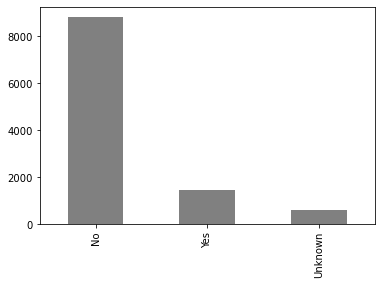

In [54]:
#Show a plot of the total number of responses (for each response type - "Yes"/"No").
df["response"].value_counts().plot(kind="bar",color="grey")


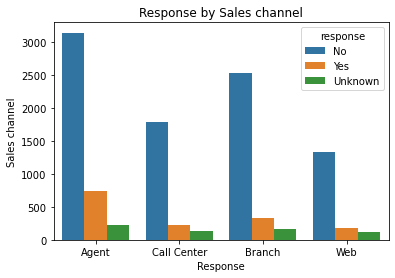

In [55]:
#Show a plot of the rate of the response types by each Sales Channel.
sns.countplot(x="sales_channel",hue="response",data=df)
plt.ylabel("Sales channel")
plt.xlabel("Response")
plt.title("Response by Sales channel")
plt.show()

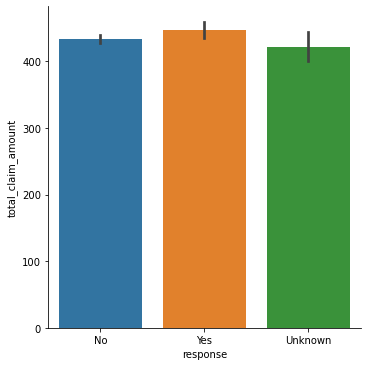

In [56]:
#Show a plot of the distribution of the Total Claim Amount, broken down by response type. 
sns.catplot(x="response",y="total_claim_amount",data=df,kind="bar")

<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

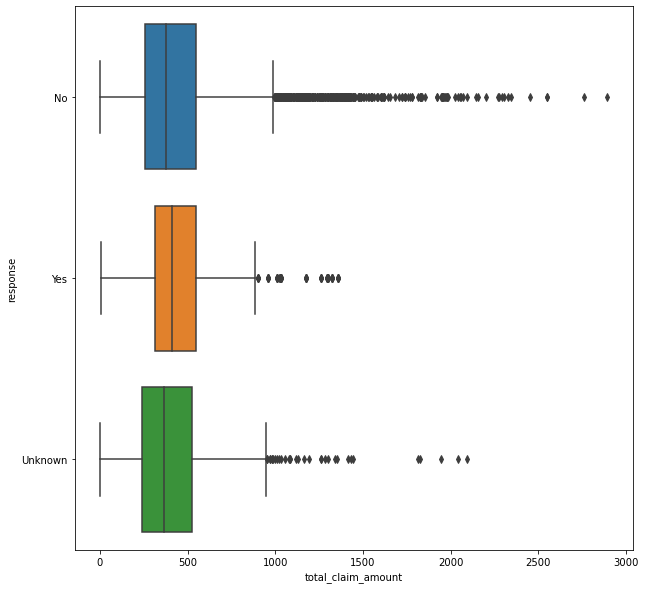

In [57]:
#Try a boxplot and distribution plot, for each response type. 
plt.figure(figsize=(10,10))
sns.boxplot(x="total_claim_amount", y="response", data=df)

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

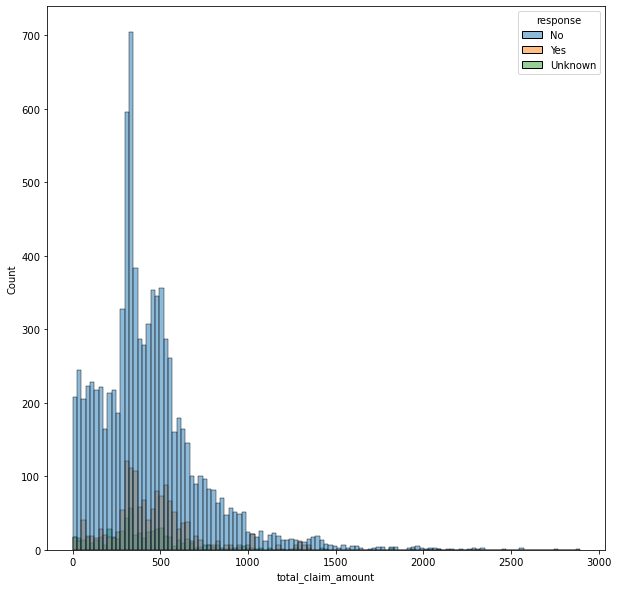

In [58]:
plt.figure(figsize=(10,10))
sns.histplot(x="total_claim_amount", hue="response", data=df)

In [59]:
#Create similar plots like in the task before, but for Income.

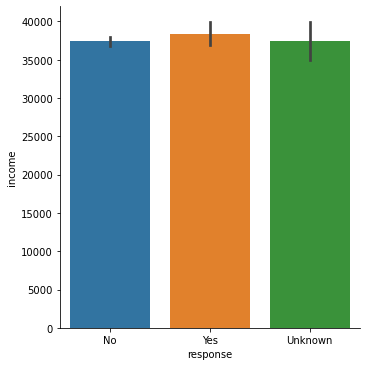

In [60]:
sns.catplot(x="response",y="income",data=df,kind="bar")

<AxesSubplot:xlabel='income', ylabel='response'>

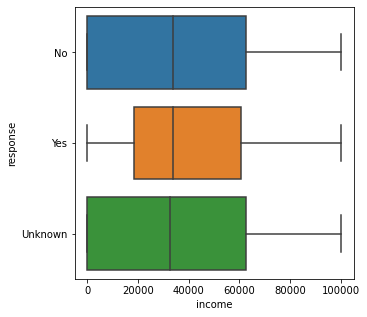

In [61]:
plt.figure(figsize=(5,5))
sns.boxplot(x="income", y="response", data=df)

<AxesSubplot:xlabel='income', ylabel='response'>

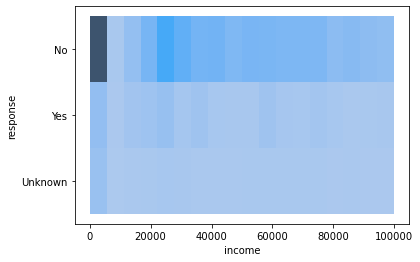

In [62]:
sns.histplot(data=df, x="income", y="response")

In [63]:
#Create a scatterplot between Total Claim Amount and Income. Play around with the settings of the scatterplot 
#(markersize, alpha level, ...) and in doing so try to identify more features within the data just visually. 
#You can also try different seaborn plots. Check for example this link which explains how to avoid overplotting.

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

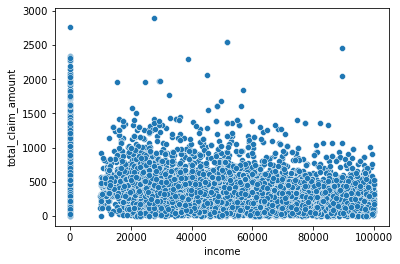

In [64]:
sns.scatterplot(data=df, x="income", y="total_claim_amount")

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

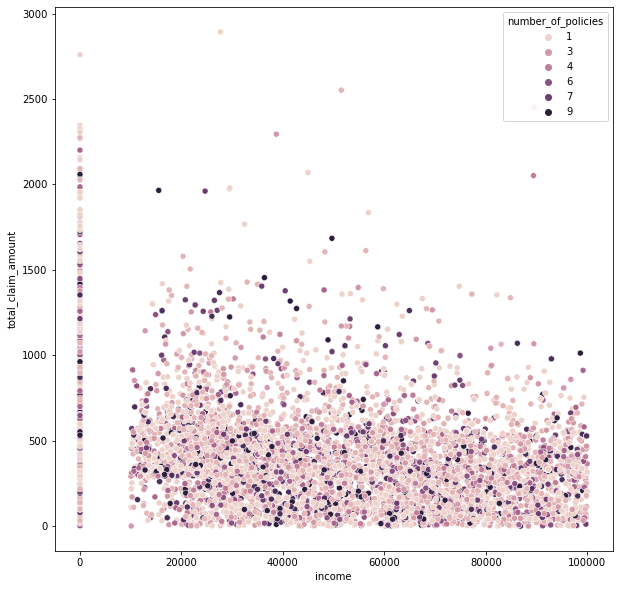

In [65]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x="income", y="total_claim_amount", hue="number_of_policies")

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

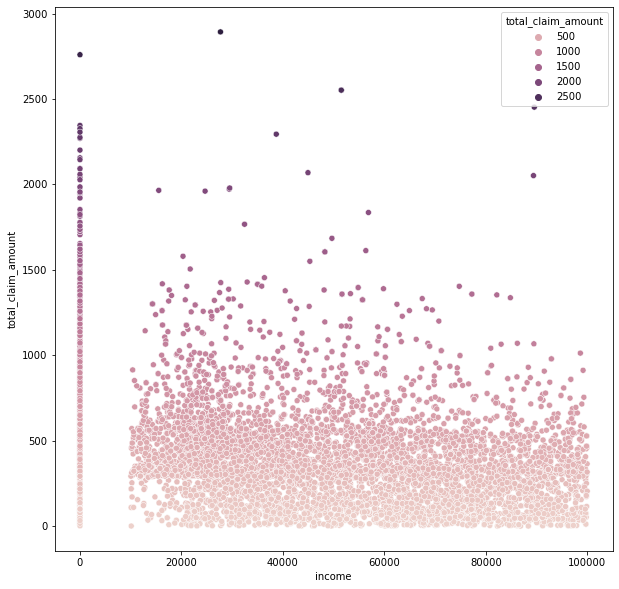

In [66]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x="income", y="total_claim_amount", hue="total_claim_amount")

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

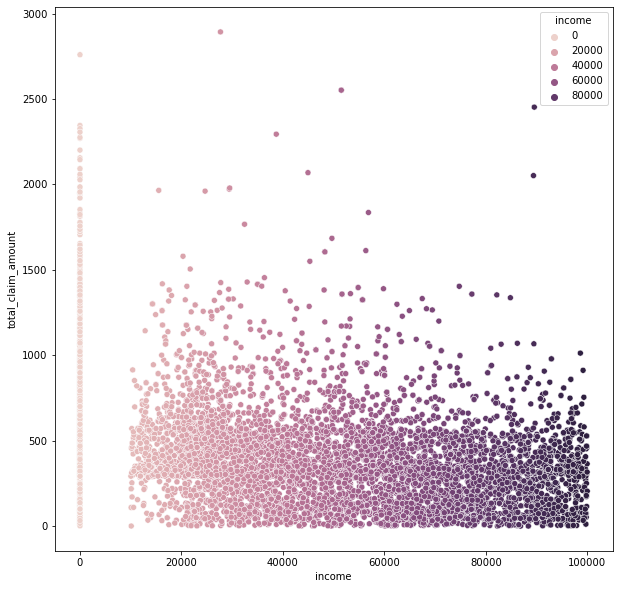

In [67]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x="income", y="total_claim_amount", hue="income")

## Round 4

In [68]:
df_numerical=df.select_dtypes(np.number)

In [69]:
df_numerical

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [70]:
df_numerical.dtypes

unnamed:_0                         int64
customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
total_claim_amount               float64
month                              int64
dtype: object

In [71]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer_lifetime_value        10910 non-null  float64
 2   income                         10910 non-null  int64  
 3   monthly_premium_auto           10910 non-null  int64  
 4   months_since_last_claim        10910 non-null  float64
 5   months_since_policy_inception  10910 non-null  int64  
 6   number_of_open_complaints      10910 non-null  float64
 7   number_of_policies             10910 non-null  int64  
 8   total_claim_amount             10910 non-null  float64
 9   month                          10910 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 852.5 KB


In [72]:
df_categorical=df.select_dtypes(include='object')

In [73]:
df_categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Unknown
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Unknown
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,Unknown
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


#### Use seaborn library to construct distribution plots for the numerical variables

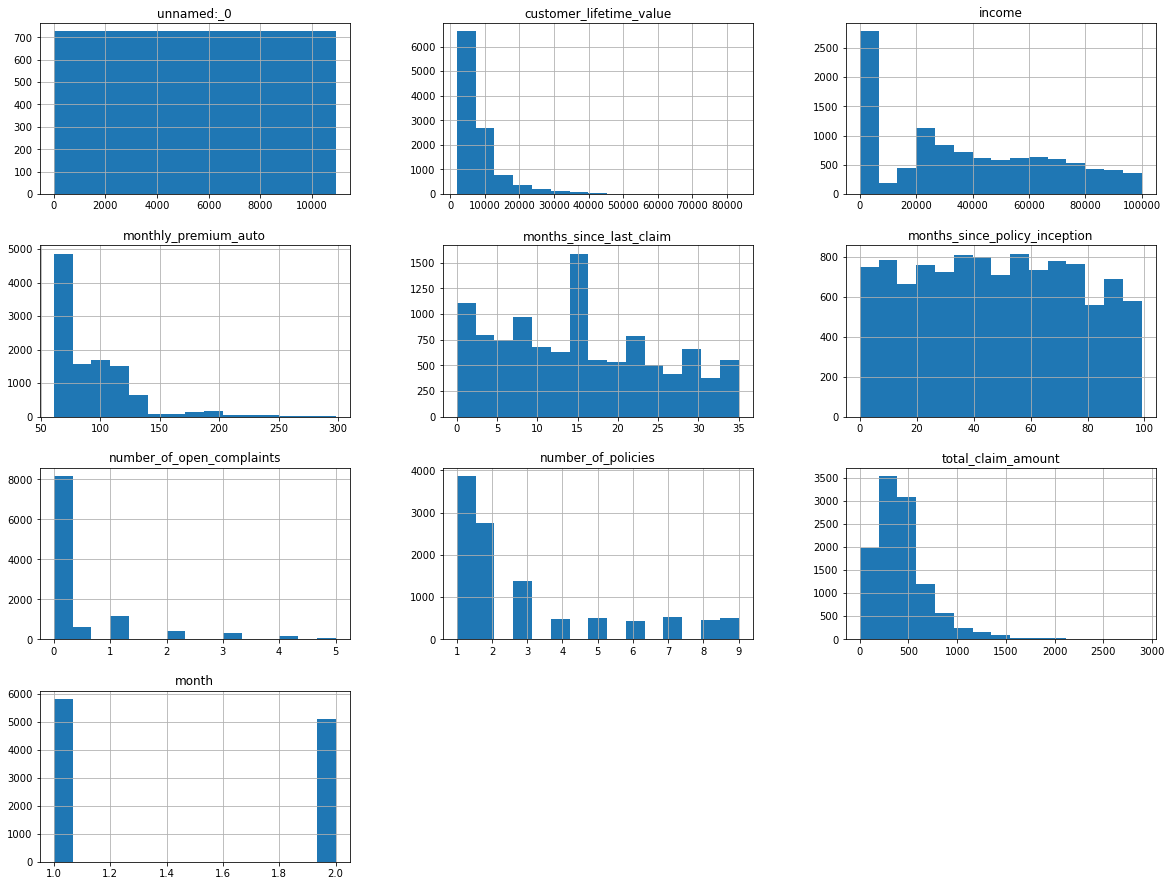

In [74]:
df_numerical.hist(bins=15, figsize=(20, 40), layout=(10, 3));

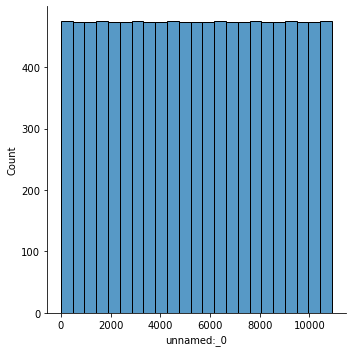

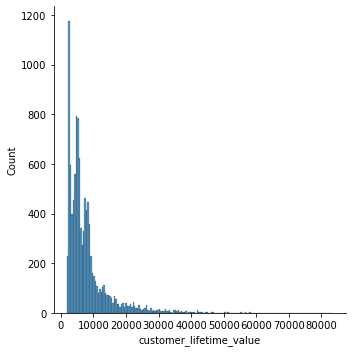

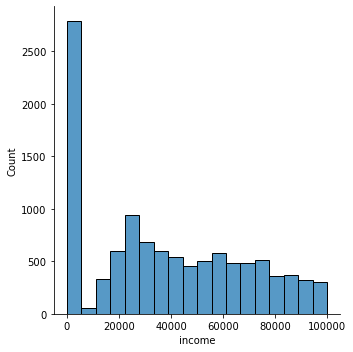

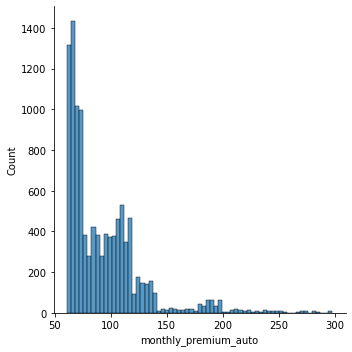

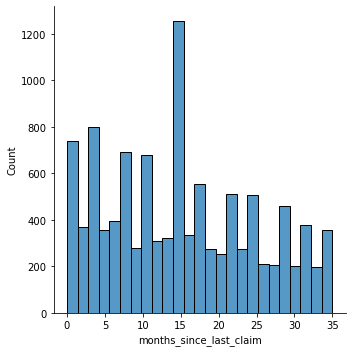

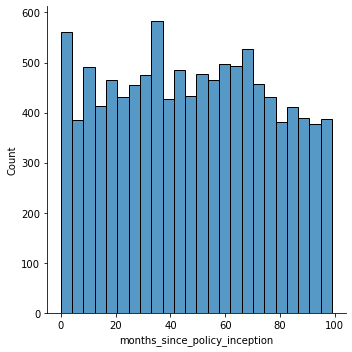

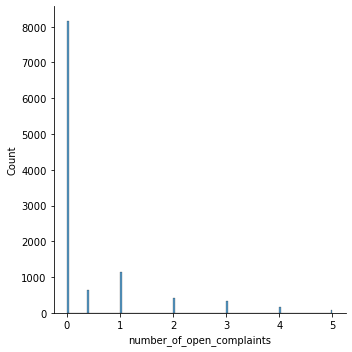

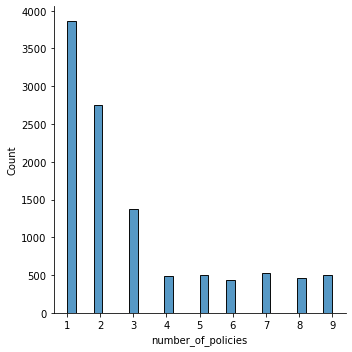

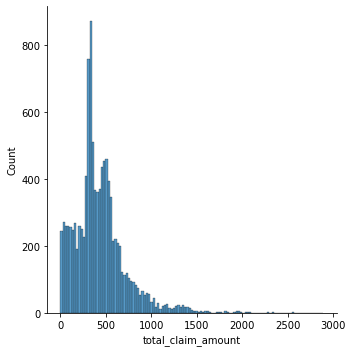

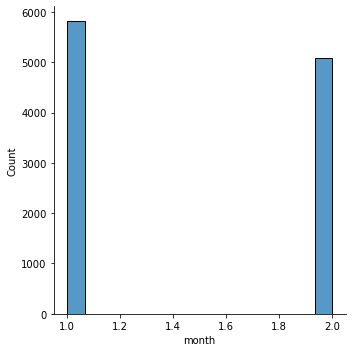

In [85]:
for i in df_numerical:
    sns.displot(df_numerical[i])

#### Use Matplotlib to construct histograms


<AxesSubplot:xlabel='state', ylabel='count'>

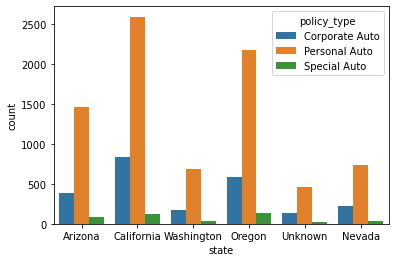

In [76]:
sns.countplot(x="state",hue="policy_type",data=df_categorical)

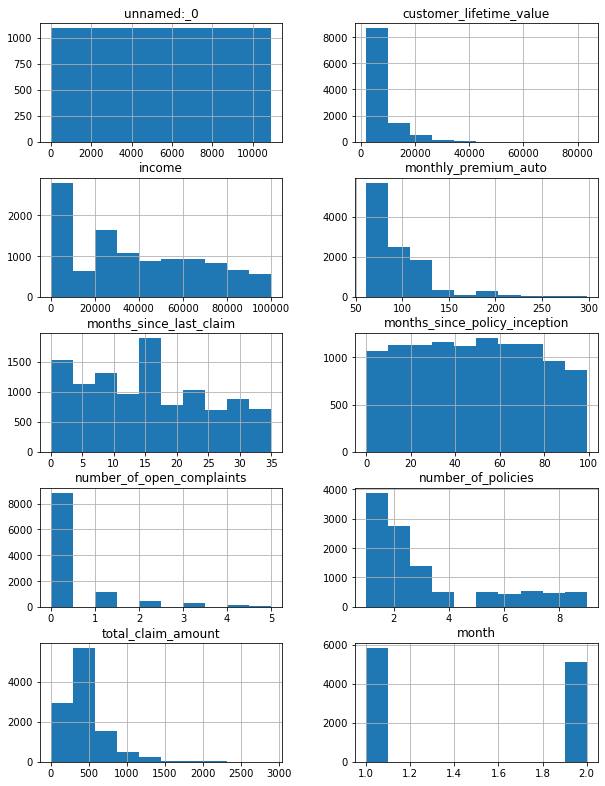

In [77]:
df_numerical.hist(figsize=(10, 25), layout=(9, 2))
plt.show()

#### Do the distributions for different numerical variables look like a normal distribution?

In [78]:
# No

#### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

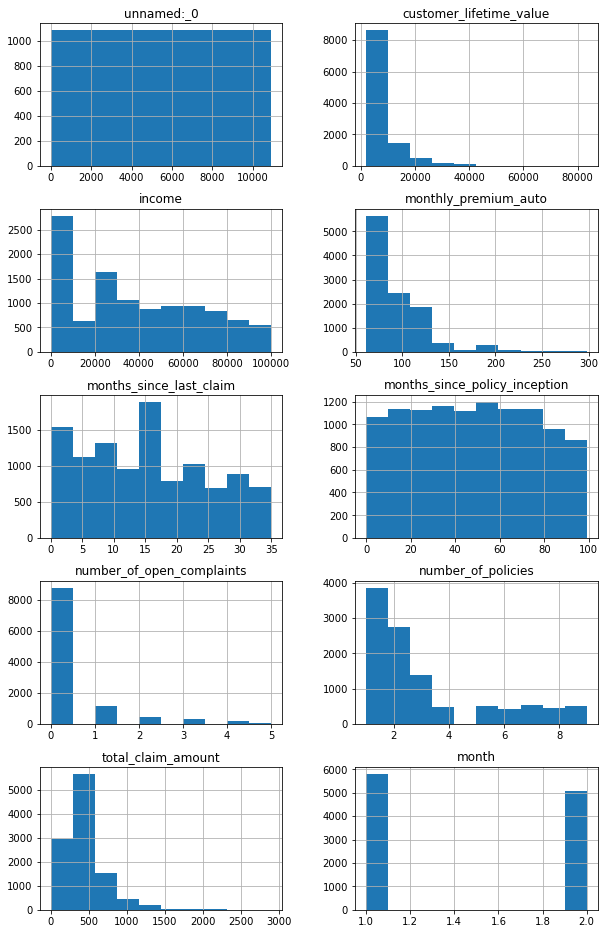

In [79]:
df_numerical.hist(figsize=(10, 30), layout=(9, 2))
plt.show()

#### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features


In [80]:
correlation = df_numerical
correlations_matrix = correlation.corr()
correlations_matrix

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
unnamed:_0,1.000000,0.001355,0.008910,0.000863,0.007722,0.012795,0.007108,0.002319,-0.000593,0.004755
customer_lifetime_value,0.001355,1.000000,0.028306,0.403069,0.015683,0.016960,-0.031501,0.016024,0.232626,-0.009234
income,0.008910,0.028306,1.000000,-0.009788,-0.023126,-0.005903,0.006956,-0.009960,-0.354141,-0.000443
monthly_premium_auto,0.000863,0.403069,-0.009788,1.000000,0.008504,0.018953,-0.010066,-0.020505,0.631799,0.007253
months_since_last_claim,0.007722,0.015683,-0.023126,0.008504,1.000000,-0.038155,0.002246,0.007425,0.012728,-0.019359
months_since_policy_inception,0.012795,0.016960,-0.005903,0.018953,-0.038155,1.000000,0.004247,-0.009123,0.003095,0.015163
number_of_open_complaints,0.007108,-0.031501,0.006956,-0.010066,0.002246,0.004247,1.000000,0.003964,-0.011025,-0.004671
number_of_policies,0.002319,0.016024,-0.009960,-0.020505,0.007425,-0.009123,0.003964,1.000000,-0.008923,0.005127
total_claim_amount,-0.000593,0.232626,-0.354141,0.631799,0.012728,0.003095,-0.011025,-0.008923,1.000000,0.001425
month,0.004755,-0.009234,-0.000443,0.007253,-0.019359,0.015163,-0.004671,0.005127,0.001425,1.000000


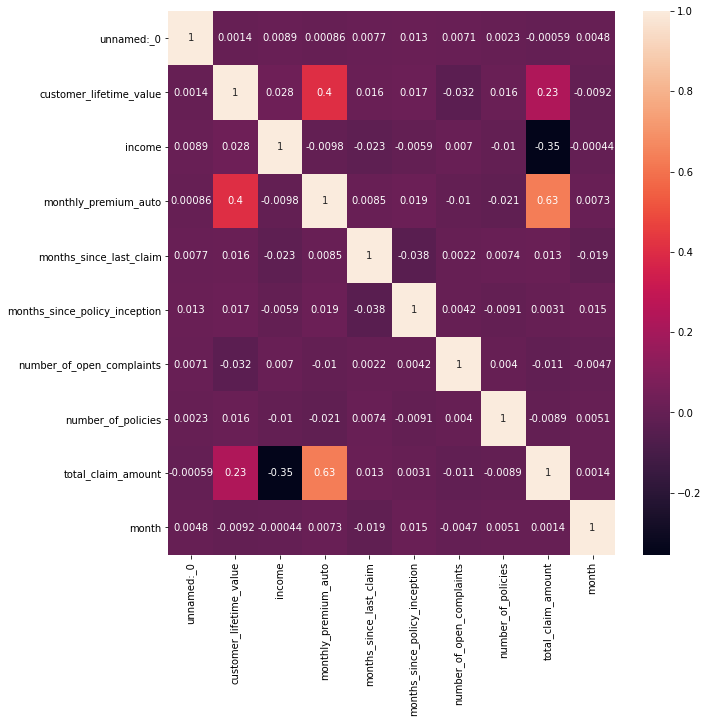

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(correlations_matrix, annot=True)
plt.show()